# SMAI Assignment - 2

## Question - `1` : Clustering

| | |
|- | -|
| Course | Statistical Methods in AI |
| Release Date | `16.02.2023` |
| Due Date | `24.02.2023` |

**Part 1:** 

Use the **Fashion-MNIST** dataset for this question.

**About the dataset:**
Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255. The training and test data sets have 785 columns. The first column consists of the class labels (see above), and represents the article of clothing. The rest of the columns contain the pixel-values of the associated image. You can check out the dataset here: https://www.kaggle.com/datasets/zalando-research/fashionmnist

1a) Load the dataset and use the K Means algorithm **(You are allowed to use the library)**. You need to find the optimal number of clusters using the
> i) elbow method
    >> Plot the graph between average distance and the number of clusters graph while using the elbow method. Report the optimal number of clusters found.

> ii) silhoette method
    >> Plot the graph between silhoutte score and number of clusters using silhoette method. Report the optimal number of clusters found.

1b) Experiment with different cluster initialisation methods [k-means++, forgy ("random" in sklearn)].


1c) Visualize the dataset to depict the clusters formed. (prefer T-SNE)

</br>
</br>
</br>
</br>


**Part 2:**
</br>
In this task, you need to implement Hierarchical clustering (agglomerative) on the same dataset.

2a) visualize a dendogram and find out the optimal number of clusters with the help of Dendogram. Explain the procedure.


2b) Implement Hierarchical clustering using: </br>
> i) single linkage

> ii) Complete linkage

Visualize the clusters obtained using these linkages and compare. 

</br>
</br>
</br>
</br>

**Part 3:**
</br>
In this part, we’ll implement kmeans to compress an image. In an original image each pixel has 3 8-bit integers, therefore the size of the image is **3 x height x width x 8**. Our task is to compress the image where it only comprises of **k** unique colors, where k = number of clusters formed by the algorithm where each pixel is a 3D datapoint. Therefore the new compressed image can be stored in **k x 24 + width x height x b**. (b -> number of bits used to represent the integer *k*, since each pixel will have a color value from 0 to k-1). Now your task is to experiment with different values of k (atleast 3) and show the compressed image along with the value of data reduction (in terms of bits). 

(an example image has been provided in the folder)

## Part1: K Means

In [3]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
import random
import matplotlib.pyplot as plt
import math
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [4]:
content_text = '/content/drive/My Drive/SMAI_Assignment_2/Q1/'
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
from keras.datasets import fashion_mnist
(trainX, trainy), (testX, testy) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [6]:
type(testX)
testX = testX.reshape(testX.shape[0], testX.shape[1]*testX.shape[2])

In [7]:
import matplotlib.pyplot as plt
def plot(lst1, lst2, method):
  # plt.plot([x1, x2], [y1, y2], 'r')
    plt.plot(lst1, lst2, '-')
    plt.xlabel("No of Iterations")
    plt.ylabel("Score")
    plt.title(method)
    plt.show()

In [8]:
#implement elbow method from scratch
def elbow(no_of_clusters):
    # for i in range(10):
    classifier = KMeans(init='random', n_clusters=no_of_clusters)
    classifier.fit_predict(testX)
    # print(classifier.shape)
    tot_sum = 0
    for val in range(testX.shape[0]):
        tot_sum += np.square(np.linalg.norm(classifier.cluster_centers_[classifier.labels_[val]] - testX[val]))
    return tot_sum

lst_elbow_1 = []
lst_elbow_2 = []
for i in range(1, 20):
    lst_elbow_1.append(i)
    lst_elbow_2.append(elbow(i))

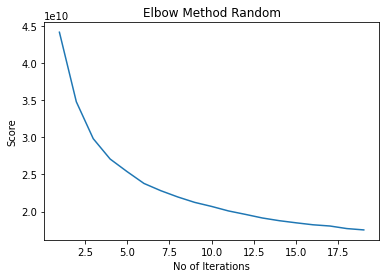

In [9]:
plot(lst_elbow_1, lst_elbow_2, "Elbow Method Random")

In [10]:
def elbow(no_of_clusters):
    # for i in range(10):
    classifier = KMeans(init='k-means++', n_clusters=no_of_clusters)
    classifier.fit_predict(testX)
    # print(classifier.shape)
    tot_sum = 0
    for val in range(testX.shape[0]):
        tot_sum += np.square(np.linalg.norm(classifier.cluster_centers_[classifier.labels_[val]] - testX[val]))
    return tot_sum

lst_elbow_1 = []
lst_elbow_2 = []
for i in range(1, 20):
    lst_elbow_1.append(i)
    lst_elbow_2.append(elbow(i))

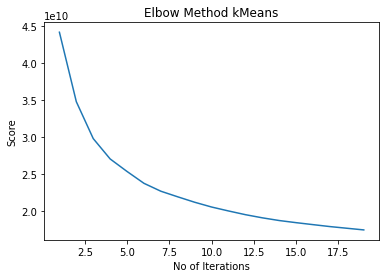

In [11]:
plot(lst_elbow_1, lst_elbow_2, "Elbow Method kMeans")

Optimal value of k is around 6-7


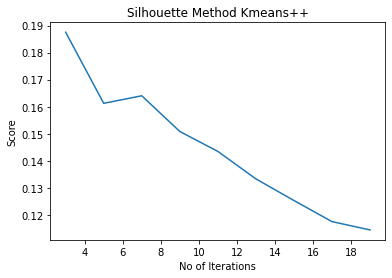

In [12]:
#implement silhouette method from scratch
def silhouette(no_of_clusters):
    classifier = KMeans(init = 'k-means++',n_clusters=no_of_clusters)
    val = classifier.fit_predict(testX)
    return silhouette_score(testX, val)

lst_silhouette_1 = []
lst_silhouette_2 = []
for i in range(3, 20, 2):
    lst_silhouette_1.append(i)
    lst_silhouette_2.append(silhouette(i))

plot(lst_silhouette_1, lst_silhouette_2, "Silhouette Method Kmeans++")

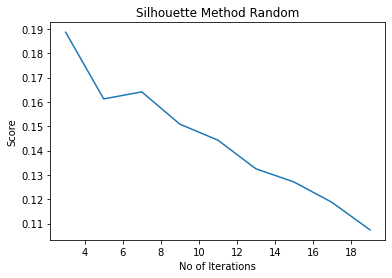

In [13]:
#implement silhouette method from scratch
def silhouette(no_of_clusters):
    classifier = KMeans(init = 'random',n_clusters=no_of_clusters)
    val = classifier.fit_predict(testX)
    return silhouette_score(testX, val)

lst_silhouette_1 = []
lst_silhouette_2 = []
for i in range(3, 20, 2):
    lst_silhouette_1.append(i)
    lst_silhouette_2.append(silhouette(i))

plot(lst_silhouette_1, lst_silhouette_2, "Silhouette Method Random")

Optimal value is around 5-7

In [14]:
# from keras.datasets import fashion_mnist
(trainX, trainy), (testX, testy) = fashion_mnist.load_data()

# you can performs your training on train/test dataset alone if there are computational issues

In [23]:
testX=testX.reshape(testX.shape[0], testX.shape[1]*testX.shape[2])

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patheffects as PathEffects
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')
sns.set_palette('muted')
sns.set_context("notebook", font_scale=1.5,
                rc={"lines.linewidth": 2.5})

def fashion_scatter(x_set, colors, val=0):
    ans = []
    if val == 0:
        val = len(np.unique(colors))
    lst = np.array(sns.color_palette("hls", val))
    f = plt.figure(figsize=(8, 8))
    ax = plt.subplot(aspect='equal')
    scatter_plot = ax.scatter(x_set[:,0], x_set[:,1], lw=0, s=59, c=lst[colors.astype(int)])
    plt.xlim(-70, 70)
    plt.ylim(-70, 70)
    for val in range(val):
        xtext, ytext = np.median(x_set[colors == val], axis=0)
        txt = ax.text(xtext, ytext, str(val), fontsize=24)
        txt.set_path_effects([
            PathEffects.Stroke(linewidth=5, foreground="w"),
            PathEffects.Normal()])
        ans.append(txt)

    return f, ax, scatter_plot, ans

(<Figure size 576x576 with 1 Axes>,
 <AxesSubplot:>,
 [Text(39.68197, -40.450455, '0'),
  Text(67.42206, 10.6388645, '1'),
  Text(-18.137283, -35.754192, '2'),
  Text(30.459726, -6.144315, '3'),
  Text(-9.9316845, -44.541542, '4'),
  Text(-17.023989, 36.58461, '5'),
  Text(-8.216465, -27.746372, '6'),
  Text(-41.498573, 52.767895, '7'),
  Text(-45.10869, 1.1056755, '8'),
  Text(14.235432, 55.661453, '9')])

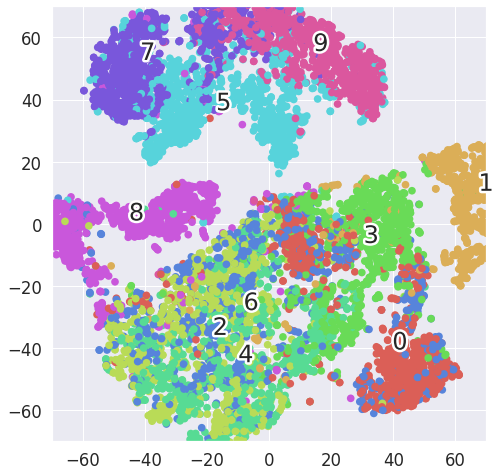

In [26]:
from sklearn.manifold import TSNE
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

classifier = TSNE(random_state=1).fit_transform(testX)
fashion_scatter(classifier, testy)

In [48]:
# from sklearn.manifold import TSNE
# from warnings import simplefilter
# simplefilter(action='ignore', category=FutureWarning)

# classifier = TSNE(random_state=1).fit_transform(testX)
# fashion_scatter(classifier, testy, 6)

(10000, 2)


<AxesSubplot:xlabel='X', ylabel='Y'>

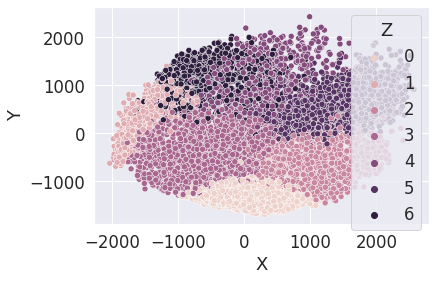

In [66]:
from sklearn.decomposition import PCA
import sklearn.cluster as cluster
X = testX.reshape(testX.shape[0] , -1)
y = np.copy(testy)
scaler = StandardScaler()
scaled_features = scaler.fit_transform(X)
kmeans=cluster.KMeans(n_clusters=7,init="k-means++")
kmeans=kmeans.fit(X)
pca = PCA(n_components = 2)
x_new = pca.fit_transform(X)
print(x_new.shape)
x_new_df = pd.DataFrame(x_new,columns=['X','Y'])
Clusters = pd.DataFrame(kmeans.labels_,columns=["Z"])
Clusters = Clusters.reset_index(drop=True)
x_new_df = x_new_df.join(Clusters)
sns.scatterplot(x='X', y='Y',hue = 'Z', data=X_rd_df)


<AxesSubplot:xlabel='X', ylabel='Y'>

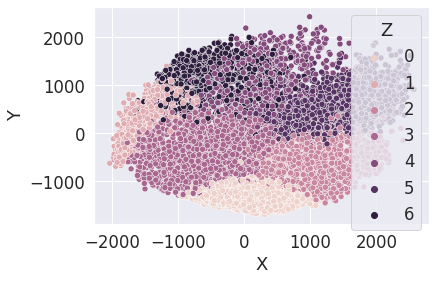

In [69]:

kmeans=cluster.KMeans(n_clusters=6,init="random")
kmeans=kmeans.fit(X)
pca = PCA(n_components = 2)
x_new = pca.fit_transform(X)
# print(x_new.shape)
x_new_df = pd.DataFrame(x_new,columns=['X','Y'])
Clusters = pd.DataFrame(kmeans.labels_,columns=['Z'])
Clusters = Clusters.reset_index(drop=True)
x_new_df = x_new_df.join(Clusters)

sns.scatterplot(x='X', y='Y',hue = 'Z', data=X_rd_df)

## Part2: Hierarchical clustering

In [28]:
# implement hierarchical clustering ( you can use scikit module)
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
def hierarchical_clustering():
    clustering = AgglomerativeClustering(n_clusters = 2).fit(testX) 
    return (clustering.labels_)

hierarchical_clustering()

array([1, 0, 0, ..., 0, 0, 1])

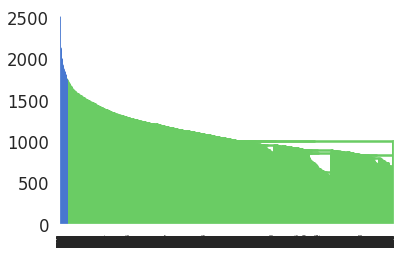

In [29]:
#visualize a dendogram
import sys
sys.setrecursionlimit(9000)

from scipy.cluster.hierarchy import dendrogram, linkage
def dendogram(method):
    dendrogram(sch.linkage(testX, method=method), p=16)
    plt.show()

dendogram("single")

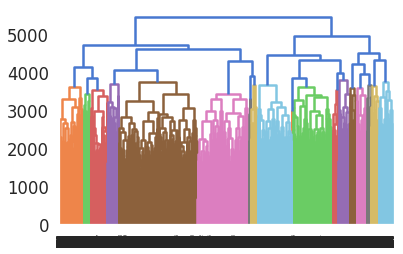

In [30]:
dendogram("complete")

Optimal value is around 2-3

In [53]:
# def hierarchical_clustering(testX, testy, clusters, method):
#   classifier = AgglomerativeClustering(n_clusters=clusters, affinity="euclidean", linkage=method)
#   classifier.fit(testX)
#   plt.scatter(testX, testy, c=classifier.labels_, cmap = "rainbow")
#   plt.show()
X = testX.reshape(testX.shape[0] , -1)
y = np.copy(testy)
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
x_val = pca.fit_transform(X)
print(x_val.shape)
x_val_df = pd.DataFrame(x_val,columns=['X','Y'])
def hierarchical_clustering(X,num_c,method):
  classifier = AgglomerativeClustering(n_clusters=num_c,affinity="euclidean",linkage=method)
  classifier.fit(X)
  plt.scatter(x_val_df['X'],x_val_df['Y'],c=classifier.labels_, cmap = "rainbow")
  plt.show()

(10000, 2)


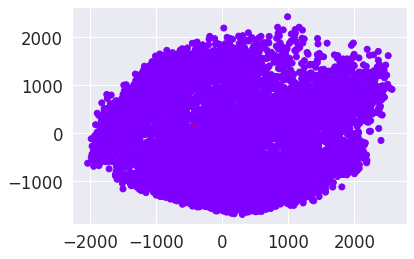

In [54]:
hierarchical_clustering(X, 3, "single")

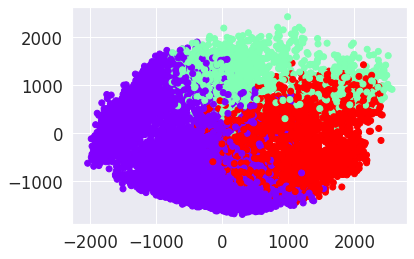

In [55]:
hierarchical_clustering(X, 3, "complete")

Single linkage measures the distance between the closest points in each cluster, while complete linkage measures the distance between the farthest points in each cluster. This can lead to different interpretations of what constitutes a "good" cluster.
<br>
Single linkage tends to produce more connected clusters, as it only considers the distance between the closest points in each cluster. Complete linkage, on the other hand, tends to produce more disjoint clusters, as it considers the distance between the farthest points in each cluster.
<br>
Single linkage is more sensitive to outliers, as it tends to form long, skinny clusters that are connected by a few outlying points. In contrast, complete linkage tends to form more compact clusters that are less affected by outliers.

In [ ]:
# X = testX.reshape(testX.shape[0] , -1)
# y = np.copy(testy)

# from sklearn.decomposition import PCA
# import sklearn.cluster as cluster
# pca = PCA(n_components = 2)
# x_new = pca.fit_transform(X)
# scaler = StandardScaler()
# scaled_features = scaler.fit_transform(X)
# kmeans=cluster.KMeans(n_clusters=7,init="random")

# kmeans=kmeans.fit(X)
# x_new_df = pd.DataFrame(x_new,columns=['X-axis','Y-axis'])
# Clusters = pd.DataFrame(kmeans.labels_,columns=["values"])
# Clusters = Clusters.reset_index(drop=True)
# x_new_df = x_new_df.join(Clusters)

# sns.scatterplot(x="X", y="Y",hue = "Z", data=x_new_df)

**Question:** Mention the differences observed using single and complete linkage:

Answer: </br>
Find the level in the dendrogram where there is a significant change in the distance between the two levels. These changes are called the "knees" or "elbows" of the dendrogram. The optimal number of clusters is usually chosen to equal the number of clusters at the corresponding knee or elbow point. Alternatively, statistics such as silhouette scores or interval statistics can be used to determine the optimal number of clusters.

First hierarchically cluster the data using the selected distance metric and linkage method.
The result is a dendrogram, a tree diagram showing how observations in a data set are grouped.

seconds, study the dendrogram and find the longest vertical line that does not intersect with any other cluster. This line represents the maximum distance between two clusters that will be combined in the clustering process.

Third, draw a horizontal line through the dendrogram at this distance level. The number of clusters formed when this line intersects the dendrogram can potentially be considered the optimal number of clusters.
Fourth, we evaluate the coherence and separation of the resulting clusters using different metrics such as the silhouette score or the elbow method. The silhouette score measures how similar an object is to its own cluster compared to other clusters, while the elbow method looks at the percentage variance explained as a function of the number of clusters.

Repeat steps 2-4 with different distance levels until you get an acceptable number of clusters.

Finally, choose the number of clusters that best balance the coherence and separation of the clusters and are meaningful in the context of the particular research question or problem.
</br>
</br>
</br>


## Part3: Image Compression

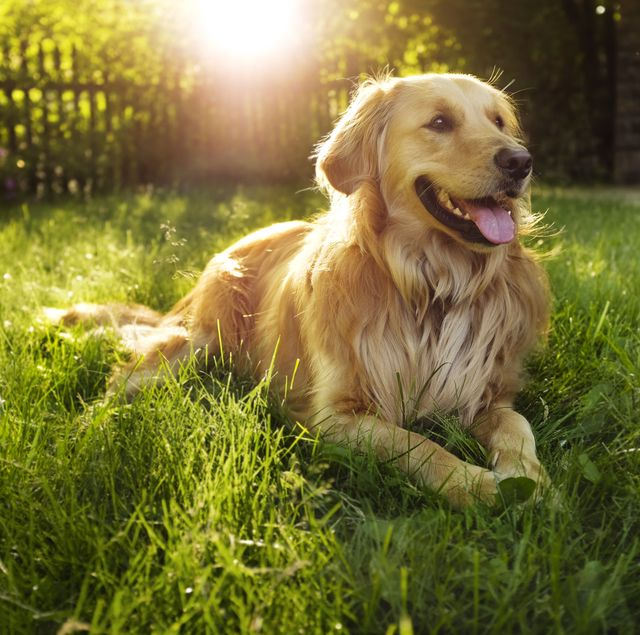

[[233 232  62]
 [230 229  59]
 [226 225  59]
 ...
 [ 27  31  14]
 [ 26  30  15]
 [ 26  30  15]] (406400, 3)


In [57]:
# Boiler plate code
img = cv2.imread(content_text + 'dog.jpg')
cv2_imshow(img)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# cv2_imshow(img)
img_size = img.shape
row, col, channels = img_size[0], img_size[1], img_size[2] 
# Reshape it to be 2-dimension
X = img.reshape(img_size[0] * img_size[1], img_size[2])
print(X, X.shape)

In [58]:
def get_image_matrix(addr = content_text + 'dog.jpg'):
    img = cv2.imread(addr) 
    # cv2_imshow(img)
    # img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    row, col, channels = img.shape[0], img.shape[1], img.shape[2] 
    X = img.reshape(img.shape[0] * img.shape[1], img.shape[2])
    return X, row, col, channels

def implement(X, no_of_clusters, row, col, channels):
    classifier = KMeans(init="random", n_clusters=no_of_clusters, max_iter=20, random_state=1)
    classifier.fit(X)
    # print(classifier.cluster_centers_)
    # print(classifier.labels_)
    img = classifier.cluster_centers_[classifier.labels_]
    # print("VAL1 :", img.shape, img)
    img = np.clip(img.astype('uint8'), 0, 255)
    # print("VAL2 :", img.shape, img)
    img = img.reshape(row, col, channels)
    # img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)

    k = no_of_clusters
    reduction = row*col*8*3 - (k*24+row*col*math.log2(k))
    return img, reduction
    
def plot_img(img):
    cv2_imshow(img)

Reduction bits: 8809848.422237776


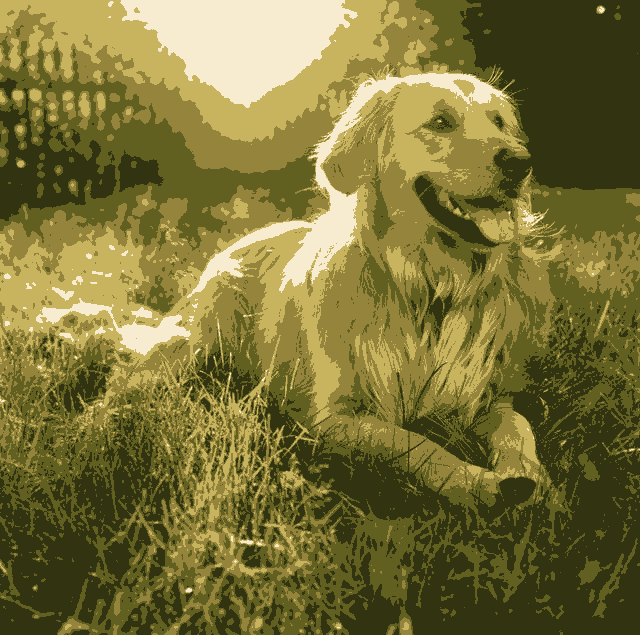

In [59]:
image, rows, cols, channels = get_image_matrix()

# columns = 3
# start = 1
# end = 31
# fig = plt.figure(figsize=(2, 3))
# for i in range(start, end, 5):
#     row, col = i//columns, i%columns
#     image, reduction = implement(img, i, rows, cols, channels)
#     fig.add_subplot(img.shape[0], img.shape[1], i)
#     plt.xlabel(f"No of Clusters : {i}")
#     # plt.ylabel("Reduction :",reduction)
#     plt.ylabel(f"Reduction : {reduction}")
#     plt.imshow(image, alpha=0.25)
# plt.show()

img, reduction = implement(image, 5, rows, cols, channels)
# print("IMAGE", img.shape)
print("Reduction bits:", reduction)
plot_img(img)


Reduction bits: 8612522.959675789


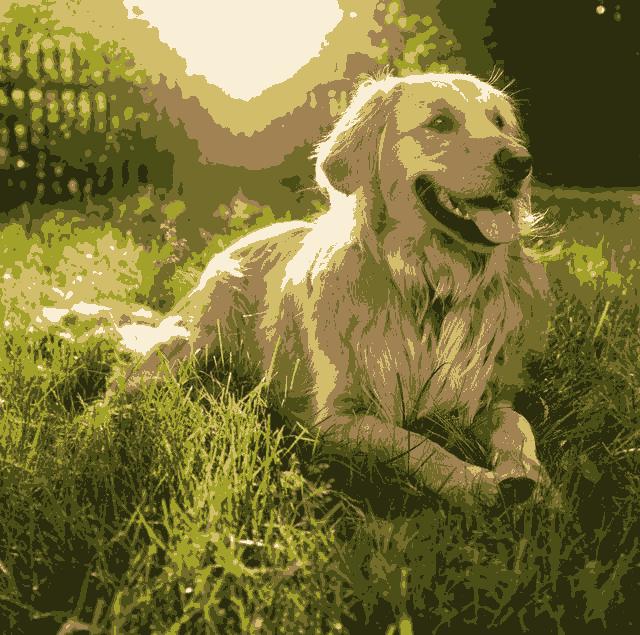

In [60]:
img, reduction = implement(image, 7, rows, cols, channels)
# print("IMAGE", img.shape)
print("Reduction bits:", reduction)
plot_img(img)

Reduction bits: 8165479.661944699


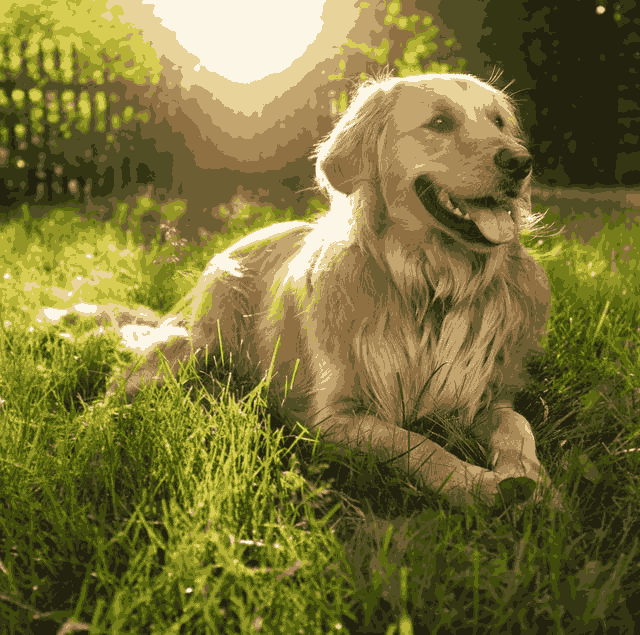

In [61]:
img, reduction = implement(image, 15, rows, cols, channels)
# print("IMAGE", img.shape)
print("Reduction bits:", reduction)
plot_img(img)